# Step 1: Data Preparation

In [46]:
import pandas as pd

# Load the dataset
df = pd.read_csv('telco-customer-churn (1).csv')

# Step 1: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Step 2: Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 3: Filled missing values for numeric columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Step 2: Exploratory Data Analysis (EDA)

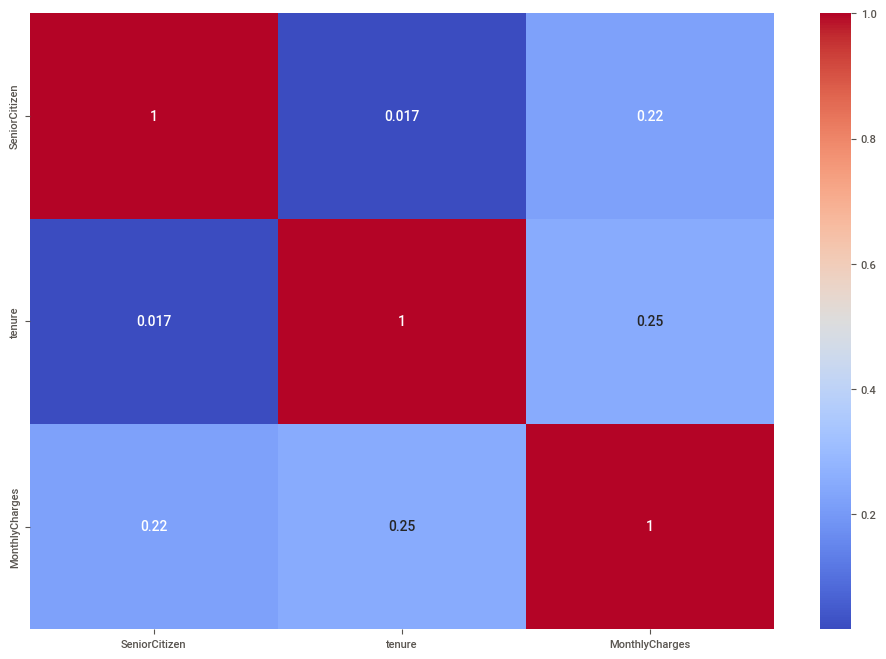

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Plot the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Step 3: Handling Data Imbalance (SMOTE)

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('telco-customer-churn (1).csv')

# Step 1: Drop non-numeric columns that don't make sense for the model
df.drop(columns=['customerID'], inplace=True)

# Step 2: Convert categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Step 3: Separate features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Step 4: Apply SMOTE to handle class imbalance
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# Check the distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(y_res.value_counts())


Class distribution after SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64


# Step 4: Train-Test Split and SweetViz Comparison

In [57]:
from sklearn.model_selection import train_test_split
import sweetviz as sv

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Use SweetViz to compare training and test sets
report = sv.compare([X_train, "Training Data"], [X_test, "Test Data"])
report.show_html('SweetViz_Comparison.html')


                                             |      | [  0%]   00:00 -> (? left)

Report SweetViz_Comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Step 5: Model Building and Evaluation

Naïve Bayes Example:

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = nb_model.predict(X_test)

# Step 3: Evaluate the model
print("Naïve Bayes Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")


Naïve Bayes Performance Metrics:
Accuracy: 0.7990338164251207
Precision: 0.7885141294439381
Recall: 0.8245948522402288
F1-Score: 0.8061509785647717


Logistic Regression Example:

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Step 1: Standardize the features (excluding the target 'Churn')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = lr_model.predict(X_test)

# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")


Accuracy: 0.8178743961352657
Precision: 0.8010752688172043
Recall: 0.8522402287893232
F1-Score: 0.8258660508083141


XGBoost Example:

In [50]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.5 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [52]:
conda install -c conda-forge xgboost


Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  conda-forge
    ca-certificates-2024.8.30  |       hf0a4a13_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.9.2               |  py312h81bd7bf_0         1.1 MB  conda-forge
    libcxx-19.1.2              |       ha82da77_0         509 KB  conda-forge
    libexpat-2.6.2             |       hebf3989_0          62 KB  conda-forge
    libsqlite-3.46.0           |       hfb93653_0         811 KB  conda-forge
    libxgboost-2.1.1           |   cpu_h27903ac_4         1.3 MB  conda-forge
    libzlib-1.2.13             |       hfb2fe0b

In [54]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")


Accuracy: 0.8478260869565217
Precision: 0.8455743879472694
Recall: 0.8560533841754051
F1-Score: 0.8507816200852677


Random Forest Example:

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")


Random Forest Performance Metrics:
Accuracy: 0.8555555555555555
Precision: 0.857824427480916
Recall: 0.8570066730219257
F1-Score: 0.8574153552694326


Step 6: Model Tuning (Hyperparameters)

In [60]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Make predictions and evaluate
y_pred = best_rf_model.predict(X_test)
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")


Best parameters found:  {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300}
Best Random Forest Accuracy: 0.8545893719806763
